In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pymoku import Moku
from pymoku.instruments import SpectrumAnalyzer

factor = 2
SMALL_SIZE = factor*8
MEDIUM_SIZE = factor*10
BIGGER_SIZE = factor*12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [17]:
# connect to the device
m = Moku('192.168.73.1')
i = SpectrumAnalyzer()
m.deploy_instrument(i)

Connection failed, either the Moku cannot be reached or the firmware is out of date


Again: Resource temporarily unavailable

In [48]:
# set scan range and resolution
i.set_span(1e0, 5e4)
i.set_rbw(1e1)
i.set_dbmscale(True)

In [52]:
# get data
frame = i.get_data(wait=True, timeout=10)
d_moku = frame.ch1
freq = frame.frequency

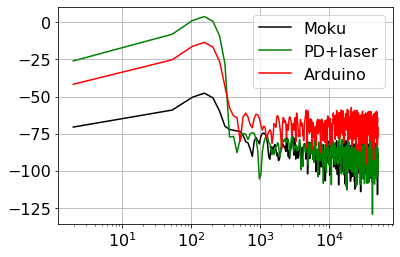

In [53]:
# plot data
plt.semilogx(freq, d_moku, color='black', label="Moku")
plt.semilogx(freq, d_PD, color='green', label="PD+laser")
plt.semilogx(freq, d_arduino, color='red', label="Arduino")
plt.legend()
plt.grid()